In [2]:
import os
import time
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
msh = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding='latin1')
import scipy.stats as st
# import chart_studio.plotly as py
# import plotly.graph_objects as go
# import plotly.express as px


import seaborn as sns
# import requests
# from bs4 import BeautifulSoup
msh = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding='latin1')

In [3]:
dane=msh[['Location','Date','Injured','Fatalities','Total victims','Age','Gender','Race' ,'Policeman Killed','Latitude','Longitude']]
dane

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Sutherland Springs, TX",11/5/2017,20,26,46,26,M,White,0.0,NaN,NaN
1,"Thornton, CO",11/1/2017,0,3,3,47,M,White,0.0,NaN,NaN
2,"Edgewood, MD",10/18/2017,3,3,6,37,M,Black,0.0,NaN,NaN
3,"Las Vegas, NV",10/1/2017,527,59,585,64,M,White,1.0,36.181271,-115.134132
4,"San Francisco, CA",6/14/2017,2,3,5,38,M,Asian,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
318,"Chicago, Illinois",1/17/1974,3,1,4,14,Male,Unknown,0.0,41.839280,-87.688181
319,"New Orleans, Louisiana",12/31/1972,13,10,22,23,Male,Black American or African American,4.0,30.068724,-89.931474
320,"Spokane, Washington",11/11/1971,4,2,5,NaN,Male,White American or European American,0.0,47.673674,-117.415984
321,"Mesa, Arizona",11/12/1966,1,5,6,18,Male,White American or European American,0.0,33.422687,-111.816320


In [4]:
dane.head()

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Sutherland Springs, TX",11/5/2017,20,26,46,26,M,White,0.0,NaN,NaN
1,"Thornton, CO",11/1/2017,0,3,3,47,M,White,0.0,NaN,NaN
2,"Edgewood, MD",10/18/2017,3,3,6,37,M,Black,0.0,NaN,NaN
3,"Las Vegas, NV",10/1/2017,527,59,585,64,M,White,1.0,36.181271,-115.134132
4,"San Francisco, CA",6/14/2017,2,3,5,38,M,Asian,0.0,NaN,NaN


In [5]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          278 non-null    object 
 1   Date              323 non-null    object 
 2   Injured           323 non-null    int64  
 3   Fatalities        323 non-null    int64  
 4   Total victims     323 non-null    int64  
 5   Age               179 non-null    object 
 6   Gender            323 non-null    object 
 7   Race              321 non-null    object 
 8   Policeman Killed  317 non-null    float64
 9   Latitude          303 non-null    float64
 10  Longitude         303 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 21.5+ KB


In [6]:
# dane['Age'] = dane['Age'].astype(int)

In [7]:
#Czyszczenie danych - sprowadzenie podzbiorów danych ras do ich głównych kategorii
dane = dane.replace('white','White') 
dane =dane.replace('White American or European American', 'White')
dane = dane.replace('White American or European American/Some other Race', 'White')
dane = dane.replace('black','Black')
dane = dane.replace('Black American or African American','Black')
dane = dane.replace('Black American or African American/Unknown','Black')
dane = dane.replace('Asian American','Asian')
dane = dane.replace('Asian American/Some other race','Asian')
dane = dane.replace('Some other race','Other')

dane = dane.replace('M','Male')
dane

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Sutherland Springs, TX",11/5/2017,20,26,46,26,Male,White,0.0,NaN,NaN
1,"Thornton, CO",11/1/2017,0,3,3,47,Male,White,0.0,NaN,NaN
2,"Edgewood, MD",10/18/2017,3,3,6,37,Male,Black,0.0,NaN,NaN
3,"Las Vegas, NV",10/1/2017,527,59,585,64,Male,White,1.0,36.181271,-115.134132
4,"San Francisco, CA",6/14/2017,2,3,5,38,Male,Asian,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
318,"Chicago, Illinois",1/17/1974,3,1,4,14,Male,Unknown,0.0,41.839280,-87.688181
319,"New Orleans, Louisiana",12/31/1972,13,10,22,23,Male,Black,4.0,30.068724,-89.931474
320,"Spokane, Washington",11/11/1971,4,2,5,NaN,Male,White,0.0,47.673674,-117.415984
321,"Mesa, Arizona",11/12/1966,1,5,6,18,Male,White,0.0,33.422687,-111.816320


In [8]:
dane.loc[dane['Race'] == 'Two or more races']


,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
92,"Roseburg, Oregon",10/1/2015,7,10,16,NaN,Male,Two or more races,0.0,43.222056,-123.352237
151,"New Orleans, Louisiana",6/29/2014,9,1,10,NaN,Male,Two or more races,0.0,30.068724,-89.931474


In [9]:
dane.loc[dane['Gender']=='M/F']

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
80,"San Bernardino, California",12/2/2015,21,14,35,NaN,M/F,Other,0.0,NaN,NaN


In [10]:
dane.describe()

,Injured,Fatalities,Total victims,Policeman Killed,Latitude,Longitude
count,323.000000,323.000000,323.000000,317.000000,303.000000,303.000000
mean,6.176471,4.436533,10.263158,0.129338,37.225076,-94.429539
std,29.889182,5.783208,33.662309,0.610294,5.536365,16.513296
min,0.000000,0.000000,3.000000,0.000000,21.325512,-161.792752
25%,1.000000,1.000000,4.000000,0.000000,33.571459,-110.205485
50%,3.000000,3.000000,5.000000,0.000000,36.443290,-88.122998
75%,5.000000,5.500000,9.000000,0.000000,41.483844,-81.703237
max,527.000000,59.000000,585.000000,5.000000,60.790539,-69.707823


In [11]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          278 non-null    object 
 1   Date              323 non-null    object 
 2   Injured           323 non-null    int64  
 3   Fatalities        323 non-null    int64  
 4   Total victims     323 non-null    int64  
 5   Age               179 non-null    object 
 6   Gender            323 non-null    object 
 7   Race              321 non-null    object 
 8   Policeman Killed  317 non-null    float64
 9   Latitude          303 non-null    float64
 10  Longitude         303 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 21.5+ KB


In [12]:
# dane['Policeman Killed'] = dane['Policeman Killed'].astype(int)

In [13]:
# dane2['Policeman Killed'] = dane2['Policeman Killed'].astype(int)
# dane2.info()

In [14]:
dane.dropna(inplace=True) #Dropna. Pozbywamy się wszystkich braków danych

In [15]:
dane['Policeman Killed'] = dane['Policeman Killed'].astype(np.int64)
dane.reset_index(inplace=True, drop=True)
dane

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Las Vegas, NV",10/1/2017,527,59,585,64,Male,White,1,36.181271,-115.134132
1,"Ferguson, Missouri",4/29/2016,4,0,4,0,Unknown,Unknown,0,38.744217,-90.305391
2,"Inglis, Florida",10/1/2015,1,3,3,57,Male,White,0,29.032706,-82.659193
3,"Charleston, South Carolina",6/17/2015,1,9,10,21,Male,White,0,32.788387,-79.933143
4,"Kennesaw, Georgia",4/29/2014,6,1,6,19,Male,White,0,34.025297,-84.617668
...,...,...,...,...,...,...,...,...,...,...,...
157,"Olean, New York",12/30/1974,7,3,10,17,Male,White,0,42.081854,-78.432139
158,"Chicago, Illinois",1/17/1974,3,1,4,14,Male,Unknown,0,41.839280,-87.688181
159,"New Orleans, Louisiana",12/31/1972,13,10,22,23,Male,Black,4,30.068724,-89.931474
160,"Mesa, Arizona",11/12/1966,1,5,6,18,Male,White,0,33.422687,-111.816320


In [16]:
# dane.loc[dane['Age']=='19,32']
# dane.loc[186,'Age']=26
# dane['Age'] = dane['Age'].astype(np.int64)

In [17]:
# dane.loc[dane['Age']=='19,22']
# dane.loc[195,'Age']=21
# dane['Age'] = dane['Age'].astype(np.int64)
# dane.iloc[195]

In [18]:
#Czyszczenie danych - w przypadkach gdzie występowały dwie wartości dla zmiennej Age zamienianie
#ich na średnią z obydwu wartości
dane.loc[dane['Age']=='17,18']
dane.loc[92,'Age']=18
dane.loc[dane['Age']=='13,11']
dane.loc[96,'Age']=12

dane.loc[dane['Age']=='15,16']
dane.loc[139,'Age']=16

dane.loc[dane['Age']=='19,32']
dane.loc[31,'Age']=26

dane.loc[dane['Age']=='19,22']
dane.loc[39,'Age']=21

dane['Age'] = dane['Age'].astype(np.int64)
dane

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Las Vegas, NV",10/1/2017,527,59,585,64,Male,White,1,36.181271,-115.134132
1,"Ferguson, Missouri",4/29/2016,4,0,4,0,Unknown,Unknown,0,38.744217,-90.305391
2,"Inglis, Florida",10/1/2015,1,3,3,57,Male,White,0,29.032706,-82.659193
3,"Charleston, South Carolina",6/17/2015,1,9,10,21,Male,White,0,32.788387,-79.933143
4,"Kennesaw, Georgia",4/29/2014,6,1,6,19,Male,White,0,34.025297,-84.617668
...,...,...,...,...,...,...,...,...,...,...,...
157,"Olean, New York",12/30/1974,7,3,10,17,Male,White,0,42.081854,-78.432139
158,"Chicago, Illinois",1/17/1974,3,1,4,14,Male,Unknown,0,41.839280,-87.688181
159,"New Orleans, Louisiana",12/31/1972,13,10,22,23,Male,Black,4,30.068724,-89.931474
160,"Mesa, Arizona",11/12/1966,1,5,6,18,Male,White,0,33.422687,-111.816320


In [19]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          162 non-null    object 
 1   Date              162 non-null    object 
 2   Injured           162 non-null    int64  
 3   Fatalities        162 non-null    int64  
 4   Total victims     162 non-null    int64  
 5   Age               162 non-null    int64  
 6   Gender            162 non-null    object 
 7   Race              162 non-null    object 
 8   Policeman Killed  162 non-null    int64  
 9   Latitude          162 non-null    float64
 10  Longitude         162 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [20]:
# dane2=dane
# dane2.groupby(['Gender']).count()

In [22]:
dane.loc[dane['Injured']==527] #Czyszczenie danych - znajdujemy wartość odstającą

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Las Vegas, NV",10/1/2017,527,59,585,64,Male,White,1,36.181271,-115.134132


In [23]:
dane.drop(dane.index[0], inplace=True) #I eliminujemy ją

In [24]:
dane.reset_index(inplace=True, drop=True)
dane


,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Ferguson, Missouri",4/29/2016,4,0,4,0,Unknown,Unknown,0,38.744217,-90.305391
1,"Inglis, Florida",10/1/2015,1,3,3,57,Male,White,0,29.032706,-82.659193
2,"Charleston, South Carolina",6/17/2015,1,9,10,21,Male,White,0,32.788387,-79.933143
3,"Kennesaw, Georgia",4/29/2014,6,1,6,19,Male,White,0,34.025297,-84.617668
4,"Killeen, Texas",4/2/2014,16,4,19,34,Male,Other,3,31.079255,-97.733923
...,...,...,...,...,...,...,...,...,...,...,...
156,"Olean, New York",12/30/1974,7,3,10,17,Male,White,0,42.081854,-78.432139
157,"Chicago, Illinois",1/17/1974,3,1,4,14,Male,Unknown,0,41.839280,-87.688181
158,"New Orleans, Louisiana",12/31/1972,13,10,22,23,Male,Black,4,30.068724,-89.931474
159,"Mesa, Arizona",11/12/1966,1,5,6,18,Male,White,0,33.422687,-111.816320


In [25]:
dane.loc[dane['Age']==0] #Czyszczenie danych - znajdujemy wartość z zerowym wiekiem 

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Ferguson, Missouri",4/29/2016,4,0,4,0,Unknown,Unknown,0,38.744217,-90.305391


In [26]:
dane.drop(dane.index[0], inplace=True) #I eliminujemy go

In [16]:
# dane.drop(dane.index[0], inplace=True)

In [17]:
# dane
# dane.reset_index(inplace=True, drop=True)

In [28]:
# dane.drop(dane.index[0], inplace=True)
dane

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
1,"Inglis, Florida",10/1/2015,1,3,3,57,Male,White,0,29.032706,-82.659193
2,"Charleston, South Carolina",6/17/2015,1,9,10,21,Male,White,0,32.788387,-79.933143
3,"Kennesaw, Georgia",4/29/2014,6,1,6,19,Male,White,0,34.025297,-84.617668
4,"Killeen, Texas",4/2/2014,16,4,19,34,Male,Other,3,31.079255,-97.733923
5,"Alturas, California",2/20/2014,2,4,6,44,Female,Native American or Alaska Native,0,41.491112,-120.549091
...,...,...,...,...,...,...,...,...,...,...,...
156,"Olean, New York",12/30/1974,7,3,10,17,Male,White,0,42.081854,-78.432139
157,"Chicago, Illinois",1/17/1974,3,1,4,14,Male,Unknown,0,41.839280,-87.688181
158,"New Orleans, Louisiana",12/31/1972,13,10,22,23,Male,Black,4,30.068724,-89.931474
159,"Mesa, Arizona",11/12/1966,1,5,6,18,Male,White,0,33.422687,-111.816320


In [29]:
dane.describe()

,Injured,Fatalities,Total victims,Age,Policeman Killed,Latitude,Longitude
count,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000
mean,5.493750,5.306250,10.437500,31.481250,0.12500,37.877685,-97.139075
std,8.103883,4.892552,10.725675,13.029223,0.61173,5.706439,18.069135
min,0.000000,0.000000,3.000000,12.000000,0.00000,21.325512,-161.792752
25%,1.000000,2.000000,4.000000,19.000000,0.00000,33.735253,-117.086230
50%,3.000000,5.000000,7.000000,30.500000,0.00000,37.712936,-90.375268
75%,6.000000,7.000000,11.000000,41.000000,0.00000,41.848503,-82.139859
max,70.000000,32.000000,82.000000,70.000000,4.00000,60.790539,-71.072831


In [30]:
dane.median()

Injured              3.000000
Fatalities           5.000000
Total victims        7.000000
Age                 30.500000
Policeman Killed     0.000000
Latitude            37.712936
Longitude          -90.375268
dtype: float64

In [31]:
dane.mode()

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude
0,"Seattle, Washington",3/29/2009,2.0,1.0,4.0,18.0,Male,White,0.0,32.863573,-118.539954
1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,34.176221,-117.128163
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.839280,-87.688181


In [32]:
dane.mad() #Odchylednie przeciętne

Injured              4.740937
Fatalities           3.271328
Total victims        6.567969
Age                 11.124766
Policeman Killed     0.235937
Latitude             4.706490
Longitude           15.578441
dtype: float64

In [33]:
dane.var() #Wariancja

Injured              65.672917
Fatalities           23.937068
Total victims       115.040094
Age                 169.760653
Policeman Killed      0.374214
Latitude             32.563447
Longitude           326.493636
dtype: float64

In [34]:
dane.std() #Odchylenie standardowe

Injured              8.103883
Fatalities           4.892552
Total victims       10.725675
Age                 13.029223
Policeman Killed     0.611730
Latitude             5.706439
Longitude           18.069135
dtype: float64

In [35]:
dane.quantile(0.25) #kwartyle


Injured               1.000000
Fatalities            2.000000
Total victims         4.000000
Age                  19.000000
Policeman Killed      0.000000
Latitude             33.735253
Longitude          -117.086230
Name: 0.25, dtype: float64

In [36]:
dane.quantile(0.75)


Injured              6.000000
Fatalities           7.000000
Total victims       11.000000
Age                 41.000000
Policeman Killed     0.000000
Latitude            41.848503
Longitude          -82.139859
Name: 0.75, dtype: float64

In [37]:
dane.quantile(0.1)

Injured               0.000000
Fatalities            1.000000
Total victims         3.000000
Age                  15.900000
Policeman Killed      0.000000
Latitude             32.052044
Longitude          -121.914760
Name: 0.1, dtype: float64

In [38]:
dane.max()

Location            Youngstown, Ohio
Date                        9/6/2011
Injured                           70
Fatalities                        32
Total victims                     82
Age                               70
Gender                   Male/Female
Race                           White
Policeman Killed                   4
Latitude                     60.7905
Longitude                   -71.0728
dtype: object

In [39]:
dane.min()

Location            Aiken, South Carolina
Date                            1/16/2002
Injured                                 0
Fatalities                              0
Total victims                           3
Age                                    12
Gender                             Female
Race                                Asian
Policeman Killed                        0
Latitude                          21.3255
Longitude                        -161.793
dtype: object

In [40]:
dane[['Injured','Fatalities','Total victims', 'Policeman Killed']].sum()

Injured              879
Fatalities           849
Total victims       1670
Policeman Killed      20
dtype: int64

In [41]:
dane2 = dane[['Race','Total victims']].groupby(['Race']).mean() #Średnia od total victims


In [42]:
dane2 = dane[['Race','Total victims']].groupby(['Race']).std()
dane2

,Total victims
Race,
Asian,14.726599
Black,5.301683
Latino,3.535534
Native American or Alaska Native,5.656854
Other,4.719399
Unknown,1.258306
White,12.191127


In [43]:
dane2.mean()

Total victims    6.769929
dtype: float64

In [44]:
# st.ttest_ind(dane['Race'],dane['Total victims'])

In [45]:
st.pearsonr(dane['Age'],dane['Total victims'])


(-0.04553088869905741, 0.5675210404208458)

In [46]:
dane[['Race','Total victims']].groupby(['Race']).count() #Total victims to w tym przypadku indexy, czyli df pokazuje ilu było sprawców

,Total victims
Race,
Asian,11
Black,34
Latino,2
Native American or Alaska Native,2
Other,11
Unknown,4
White,96


In [47]:
dane_race=dane[['Race','Total victims']].groupby(['Race']).sum()

In [48]:
dane_race

,Total victims
Race,
Asian,138
Black,265
Latino,19
Native American or Alaska Native,20
Other,72
Unknown,17
White,1139


In [49]:
dane_race2=dane[['Race','Total victims']].groupby(['Race']).count()

In [50]:
dane_race2

,Total victims
Race,
Asian,11
Black,34
Latino,2
Native American or Alaska Native,2
Other,11
Unknown,4
White,96


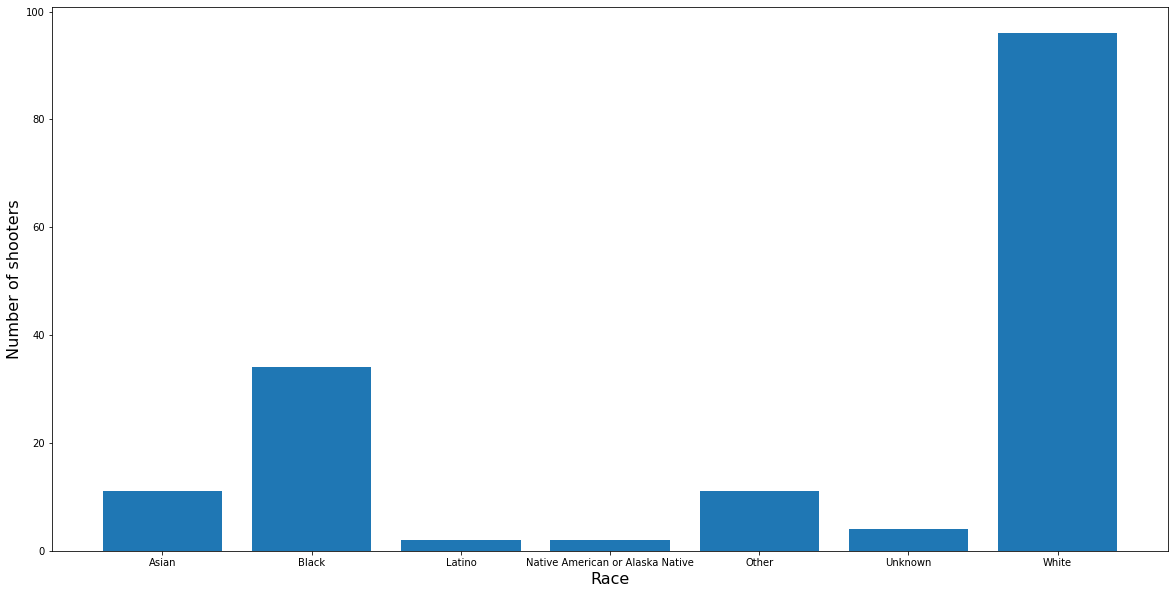

In [51]:
my_colors = ['gold', 'blue', 'red', 'green', 'black','brown','orange']
race_dict = {'Asian':11,'Black':34,'Latino':2,'Native American or Alaska Native':2,'Other':11,'Unknown':4,'White':96}
race_df = pd.Series(race_dict)
plt.figure(figsize=(20,10))
plt.bar(range(len(race_df)), race_df.values, align='center')
plt.xticks(range(len(race_df)),race_df.index.values, size='medium')

plt.xlabel('Race',fontsize =16)
plt.ylabel('Number of shooters',fontsize =16)
plt.show()

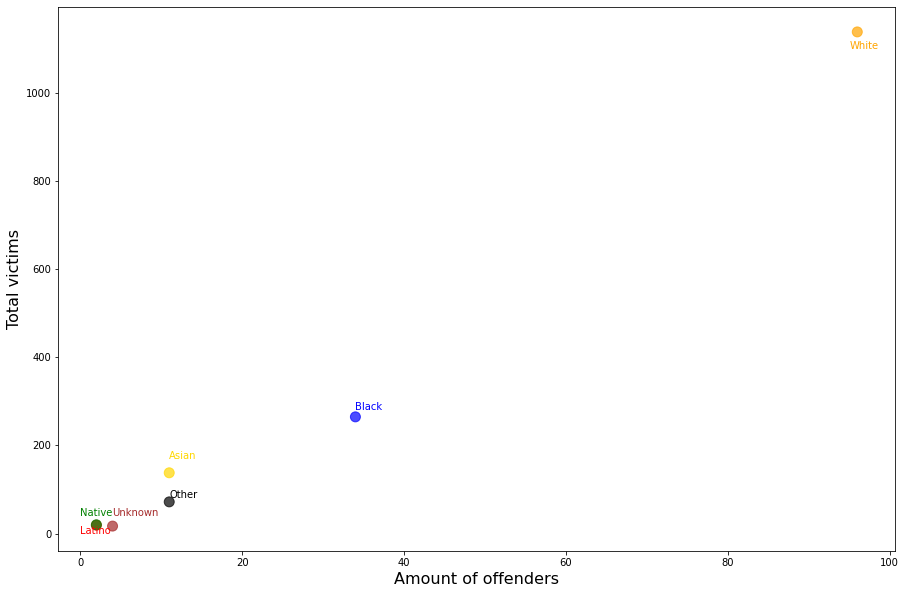

In [52]:
my_colors = ['gold', 'blue', 'red', 'green', 'black','brown','orange']
plt.figure(figsize=(15,10))
plt.scatter(dane_race2, dane_race['Total victims'], s =100, c=my_colors,alpha=0.7)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.text(95, 1100, 'White',c='orange')
plt.text(34, 280, 'Black',c='blue')
plt.text(4, 40, 'Unknown',c='brown')
plt.text(11, 80, 'Other',c='black')
plt.text(11, 170, 'Asian',c='gold')
plt.text(0, 0, 'Latino', c='red')
plt.text(0, 40, 'Native',c='green')
# plt.text(-4, -30, 'Two or more',c='purple')
plt.xlabel('Amount of offenders',fontsize =16)
plt.ylabel('Total victims',fontsize =16)
plt.show()

In [53]:
dane_w=dane[dane.Race=='White']
dane_w2=dane_w[['Race','Total victims']]
dane_b=dane[dane.Race=='Black']
dane_b2=dane_b[['Race','Total victims']]
dane_b
dane_w2
dane_a=dane[dane.Race=='Asian']
dane_a2=dane_a[['Race','Total victims']]
#Tylko dla white, black i asian bo reszta to albo other, albo unknown, albo są po 2 wyniki

In [54]:
dane_w2.describe()

,Total victims
count,96.000000
mean,11.864583
std,12.191127
min,3.000000
25%,4.000000
50%,8.000000
75%,12.250000
max,82.000000


In [55]:
dane_w2.mode()

,Race,Total victims
0,White,4


In [56]:
dane_w2.var()

Total victims    148.623575
dtype: float64

In [57]:
dane_b2.describe()

,Total victims
count,34.000000
mean,7.794118
std,5.301683
min,3.000000
25%,4.250000
50%,6.000000
75%,8.750000
max,25.000000


In [58]:
dane_b2.mode()

,Race,Total victims
0,Black,7


In [59]:
dane_b2.var()

Total victims    28.107843
dtype: float64

In [60]:
dane_a2.describe()

,Total victims
count,11.000000
mean,12.545455
std,14.726599
min,3.000000
25%,6.000000
50%,7.000000
75%,12.000000
max,55.000000


In [61]:
dane_a2.mode()

,Race,Total victims
0,Asian,6


In [62]:
dane_a2.var()

Total victims    216.872727
dtype: float64

In [63]:
st.ttest_ind(dane_w2['Total victims'],dane_b2['Total victims'])

Ttest_indResult(statistic=1.8811803364338846, pvalue=0.06221899049408107)

In [64]:
# st.pearsonr(dane_w2['Total victims'],dane_b2['Total victims'])

In [65]:
dane_age=dane[['Age','Total victims']]
dane_age

,Age,Total victims
1,57,3
2,21,10
3,19,6
4,34,19
5,44,6
...,...,...
156,17,10
157,14,4
158,23,22
159,18,6


In [66]:
# dane_age.groupby(['Age']).count
# dane_age

In [67]:

dane_age

,Age,Total victims
1,57,3
2,21,10
3,19,6
4,34,19
5,44,6
...,...,...
156,17,10
157,14,4
158,23,22
159,18,6


In [68]:
dane_age.describe()

,Age,Total victims
count,160.000000,160.000000
mean,31.481250,10.437500
std,13.029223,10.725675
min,12.000000,3.000000
25%,19.000000,4.000000
50%,30.500000,7.000000
75%,41.000000,11.000000
max,70.000000,82.000000


In [69]:
dane_age.mode() #Jedna najczęstsza wartość dla age i dwie wartości dla total victims

,Age,Total victims
0,18.0,4
1,NaN,6


In [70]:
dane_age.var()

Age              169.760653
Total victims    115.040094
dtype: float64

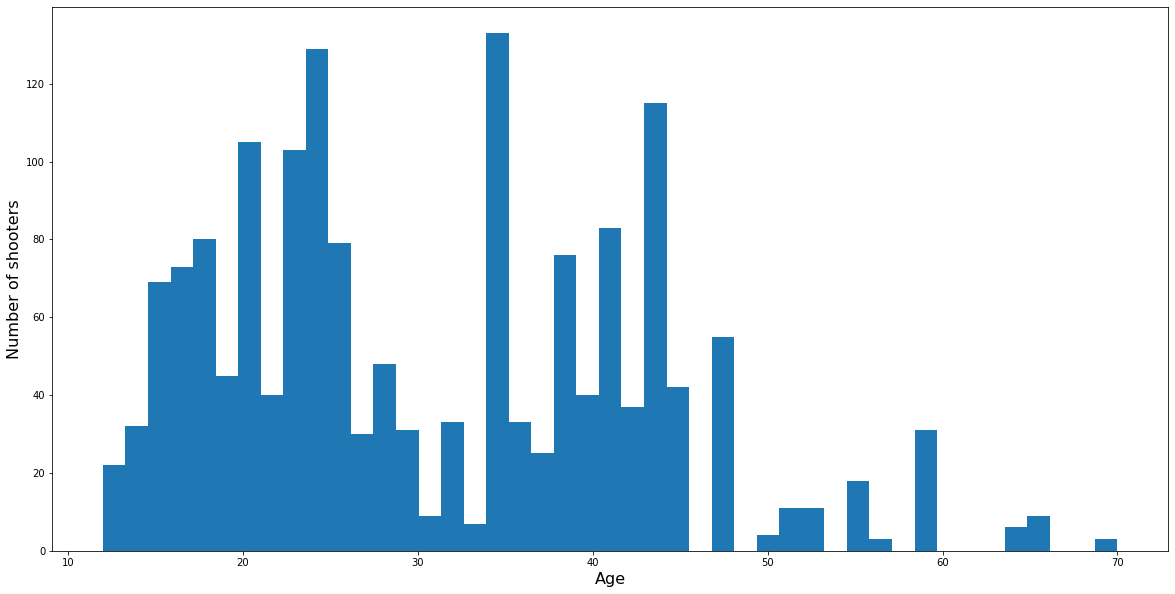

In [71]:

plt.figure(figsize=(20,10))
plt.hist(dane_age['Age'],weights=dane_age['Total victims'],bins=45) #Ratio dla osób w danym wieku
plt.xlabel('Age',fontsize =16)
plt.ylabel('Number of shooters',fontsize =16)

plt.show()


In [72]:
dane2=dane_age.groupby(['Age']).count() #To nie są w tym przypadku total victims tylko ilość sprawców w danym wieku.
dane2

,Total victims
Age,
12,2
13,1
14,7
15,6
16,5
17,6
18,8
19,6
20,5


In [73]:

st.pearsonr(dane['Age'],dane['Total victims'])

(-0.04553088869905741, 0.5675210404208458)

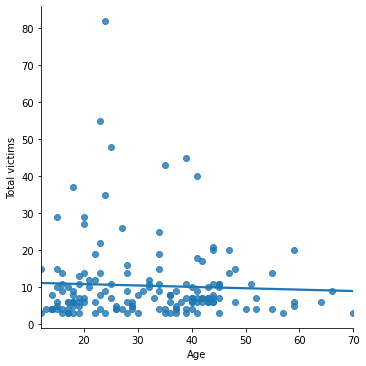

In [74]:

sns.lmplot(x='Age',y='Total victims', data = dane, ci=None) #Wykres rozrzutu dla korelacji. Brak korelacji
plt.show()

In [75]:
st.pearsonr(dane['Injured'],dane['Fatalities'])

(0.3484704896666714, 6.312583929645382e-06)

In [76]:

gender_female =dane.loc[dane['Gender'] == 'Female']
gender_male= dane.loc[dane['Gender'] == 'Male']
gender_male_female = dane.loc[dane['Gender'] == 'Male/Female'] #dwóch sprawców - kobieta i mężczyzna
gender_unknown=dane.loc[dane['Gender'] == 'Unknown']
gender_unknown

,Location,Date,Injured,Fatalities,Total victims,Age,Gender,Race,Policeman Killed,Latitude,Longitude


In [77]:
gender_female[['Gender', 'Total victims']].describe()

,Total victims
count,5.000000
mean,7.600000
std,2.073644
min,6.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,11.000000


In [78]:
gender_female[['Total victims']].mode()

,Total victims
0,6


In [79]:
gender_female[['Total victims']].var()

Total victims    4.3
dtype: float64

In [80]:
gender_male[['Gender', 'Total victims']].describe()

,Total victims
count,154.000000
mean,10.558442
std,10.910202
min,3.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,82.000000


In [81]:
gender_male[['Total victims']].mode()

,Total victims
0,4


In [82]:
gender_male[['Total victims']].var()

Total victims    119.03251
dtype: float64

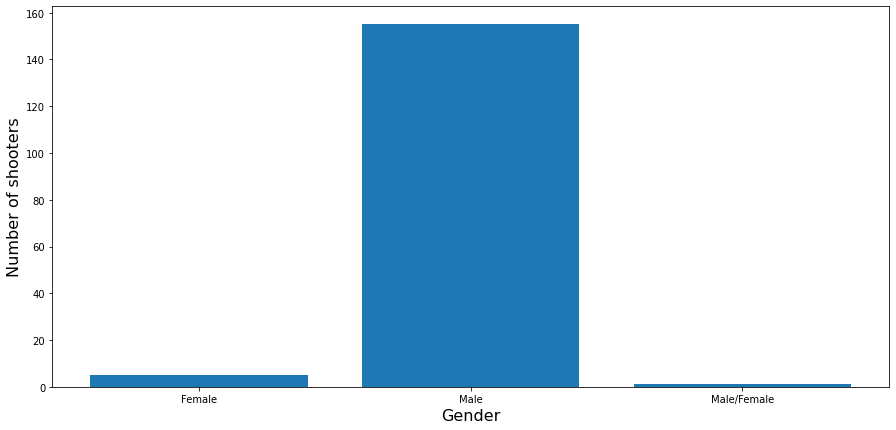

In [83]:
gender_dict ={'Female':5,'Male':155,'Male/Female':1}
gender_df = pd.Series(gender_dict)
plt.figure(figsize=(15,7))
plt.bar(range(len(gender_df)), gender_df.values, align='center')
plt.xticks(range(len(gender_df)),gender_df.index.values, size='medium')
plt.ylabel('Number of shooters',fontsize =16)
plt.xlabel('Gender',fontsize =16)

plt.show()

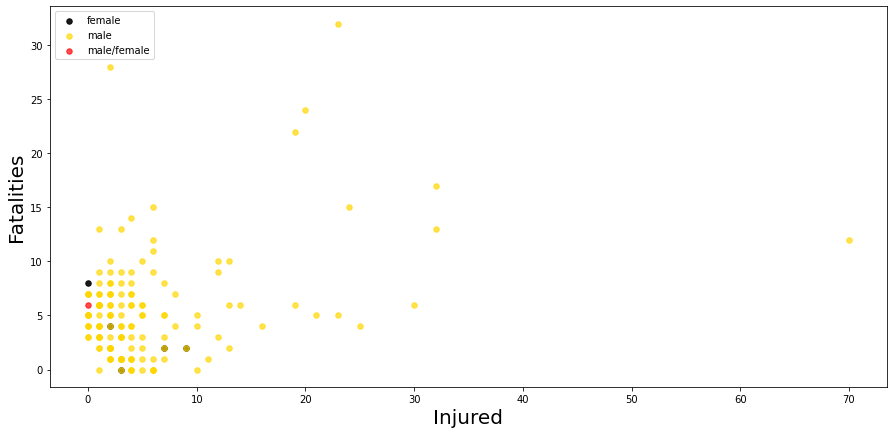

In [84]:
plt.figure(figsize=(15,7))
ax = plt.gca()
size = 30
ax.scatter(gender_female['Injured'],gender_female['Fatalities'], label='female', color ='black', s = size, alpha= 0.9)
ax.scatter(gender_male['Injured'], gender_male['Fatalities'], label='male', color='gold', s = size, alpha= 0.7)
ax.scatter(gender_male_female['Injured'], gender_male_female['Fatalities'], color="red", label='male/female', s = size, alpha= 0.7)

plt.legend(loc='upper left')
plt.xlabel('Injured',fontsize =20)
plt.ylabel('Fatalities',fontsize =20)

plt.show()



In [85]:
female_TV = dane[dane['Gender'] == 'Male']['Total victims']
male_TV = dane[dane['Gender'] == 'Female']['Total victims']
print(st.levene(male_TV, female_TV)) #variances are homogeneous
print(st.ttest_ind(female_TV, male_TV))

LeveneResult(statistic=1.044931343964525, pvalue=0.30824985955760653)
Ttest_indResult(statistic=0.604193607057479, pvalue=0.5465870168954361)


In [86]:
race_white =dane.loc[dane['Race'] == 'White']
race_black =dane.loc[dane['Race'] == 'Black']

In [87]:
race_white['Policeman Killed'].describe()

count    96.000000
mean      0.010417
std       0.102062
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Policeman Killed, dtype: float64

In [88]:
race_white['Policeman Killed'].mode()


0    0
dtype: int64

In [89]:
race_white['Policeman Killed'].var()

0.010416666666666664

In [90]:
race_black['Policeman Killed'].describe()

count    34.000000
mean      0.441176
std       1.159707
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: Policeman Killed, dtype: float64

In [91]:
race_black['Policeman Killed'].mode()

0    0
dtype: int64

In [92]:
race_black['Policeman Killed'].mode()

0    0
dtype: int64

In [93]:
white_PK = dane[dane['Race'] == 'White']['Policeman Killed']
black_PK = dane[dane['Race'] == 'Black']['Policeman Killed']
print(st.levene(white_PK, black_PK)) #variances are homogeneous
st.ttest_ind(white_PK, black_PK)

LeveneResult(statistic=13.143160009598894, pvalue=0.0004151130092178114)


Ttest_indResult(statistic=-3.6253496396346234, pvalue=0.0004151130092178115)

In [94]:
white_PK

1      0
2      0
3      0
6      1
9      0
      ..
154    0
155    0
156    0
159    0
160    0
Name: Policeman Killed, Length: 96, dtype: int64

In [95]:
black_PK

8      0
10     0
15     0
18     1
23     0
27     0
36     0
38     0
40     0
42     4
43     4
51     0
52     0
55     0
57     0
60     0
68     0
70     0
81     0
83     0
92     0
97     0
101    1
104    0
113    0
114    0
128    0
129    0
135    1
142    0
143    0
147    0
152    0
158    4
Name: Policeman Killed, dtype: int64